_Dependencies and library requirements_

In [1]:
# standard libraries
import numpy as np #numpy warnings, if any, may be safely ignored, known issue.
import pandas as pd
from collections import defaultdict
from math import * # Used for the haversine/distance calculations

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.cluster import KMeans

# for optimizations
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

_Loading in station data by year. Hierarchal dataframe with levels based on year_

In [2]:
ridership_dict = defaultdict()
station_dict = defaultdict()

for x in [2010 + x for x in range(8)] :
    station_dict[x] = pd.read_csv("https://raw.githubusercontent.com/SethDKelly/NiceRideMN/master/Nice_Ride_data/" \
                             +str(x)+"/NiceRide_station_"+str(x)+".csv")
    ridership_dict[x] = pd.read_csv("https://raw.githubusercontent.com/SethDKelly/NiceRideMN/master/Nice_Ride_data/" \
                             +str(x)+"/NiceRide_trip_history_"+str(x)+".csv")
NR_ridership = pd.concat(ridership_dict)    
NR_station = pd.concat(station_dict)

_Due to station distance matrices being different sizes current load pattern is by manual selection of year._

In [3]:
def kmeans_builder(NR_station) :
    
    # For KMeans model building
    from sklearn.cluster import KMeans

    # For Feature Optimizations
    from sklearn.decomposition import PCA

    #########################################################################
    # This sections builds the clusters for each (2010-2017) years data
    # The code uses KMeans clustering with a K value of 6
    # Appends to the DF `NR_station` the cluster each station belongs
    # clustering data is inserted into a new column `Cluster`
    ########################################################################

    NR_station['Cluster'] = int(0)

    k_val = 6
    
    for year in [2013 + x for x in range(5)] :
    
        distance_matrix = pd.DataFrame() # Reinstantiate the  Distance Matrix DataFrame for clean run
    
        # Read in the distance matrix for the particular year
        distance_matrix = pd.read_csv("https://raw.githubusercontent.com/SethDKelly/NiceRideMN/master/Nice_Ride_data/" \
                               +str(year)+"/distance_matrix_"+str(year)+".csv",index_col=0)
        
        # Optimize distance matrix to two primary x-y components
        pca = PCA(n_components=2).fit_transform(distance_matrix)
        
        # assert len(NR_station.loc[year, 'Cluster'].values) == 
        kmeans = KMeans(n_clusters=k_val, n_init=200).fit(pca)
        centers = kmeans.cluster_centers_

        for x in range(19) : # This helps to stabilize the cluster centers so there isn't so much variance per run
    
            # Reduce the dimensionality of our distance matrix
            kmeans = KMeans(n_clusters=k_val, n_init=100).fit(pca)
            centers += kmeans.cluster_centers_
            
            centered = centers / 20
            #Append to the DF `NR_station` the cluster each station belongs to in column `Cluster`
            NR_station.loc[year, 'Cluster'] =  KMeans(n_clusters=k_val, init=centered, n_init=10).fit(pca).labels_
        
    return NR_station

In [4]:
nr_station = kmeans_builder(NR_station)

/home/grimoire/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


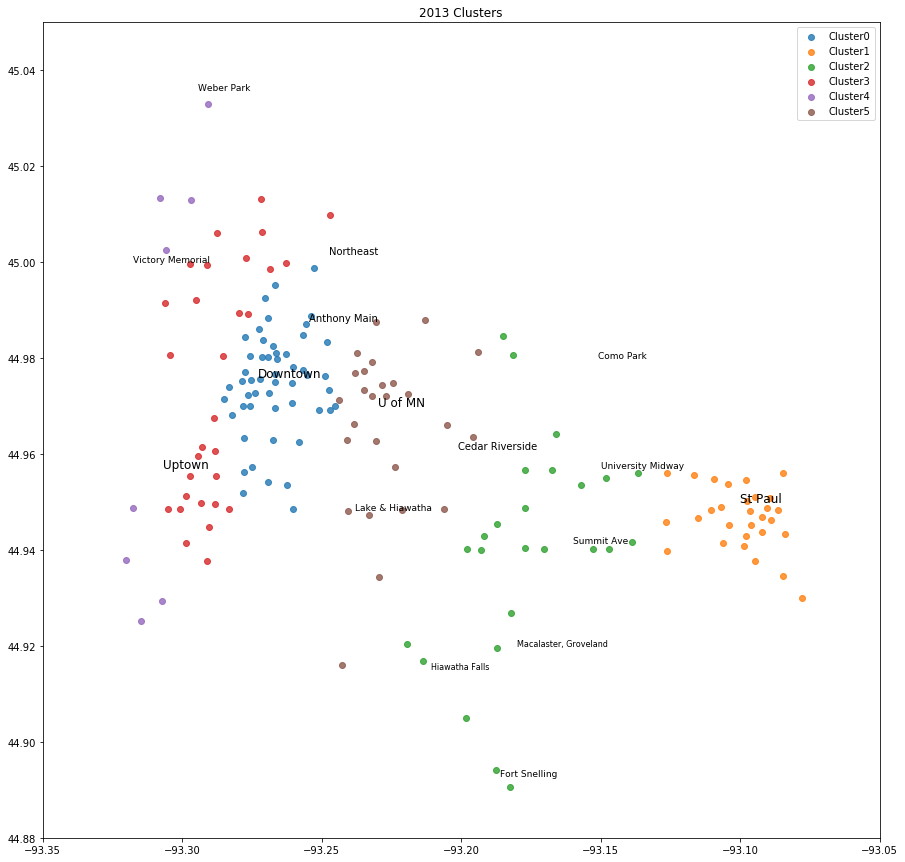

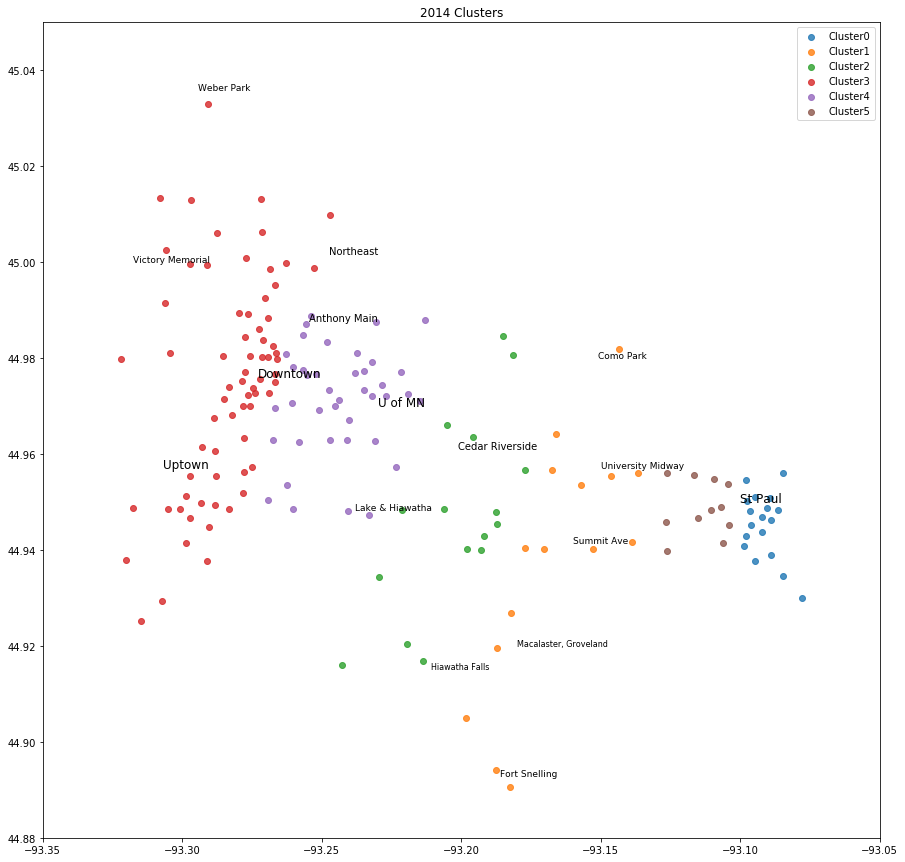

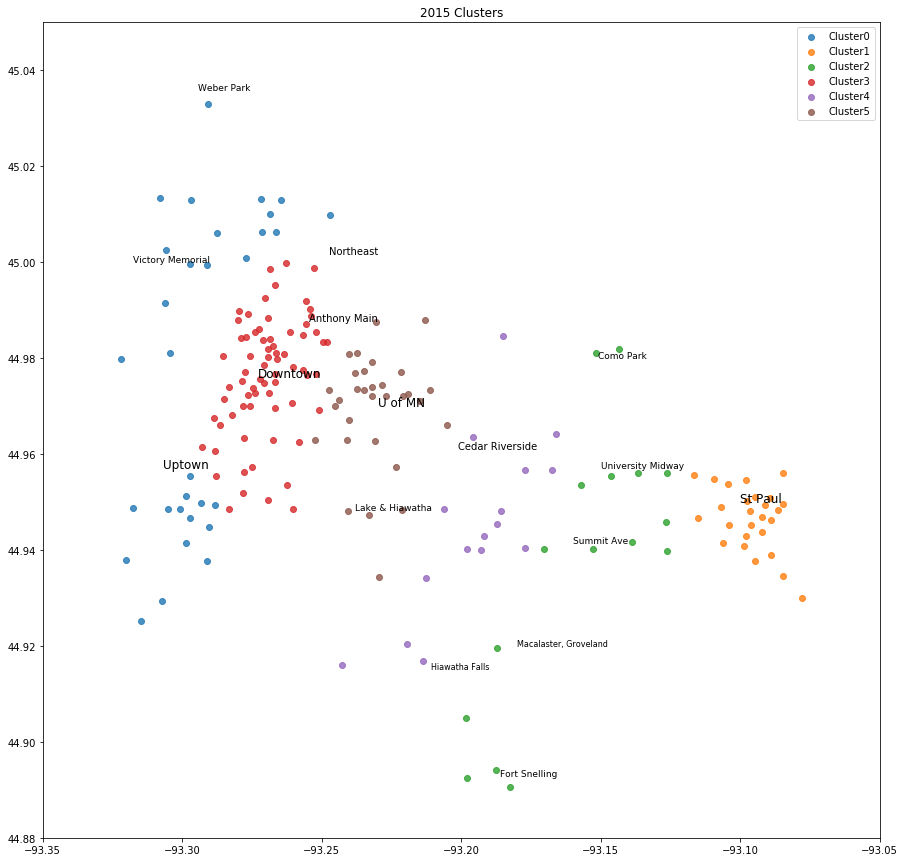

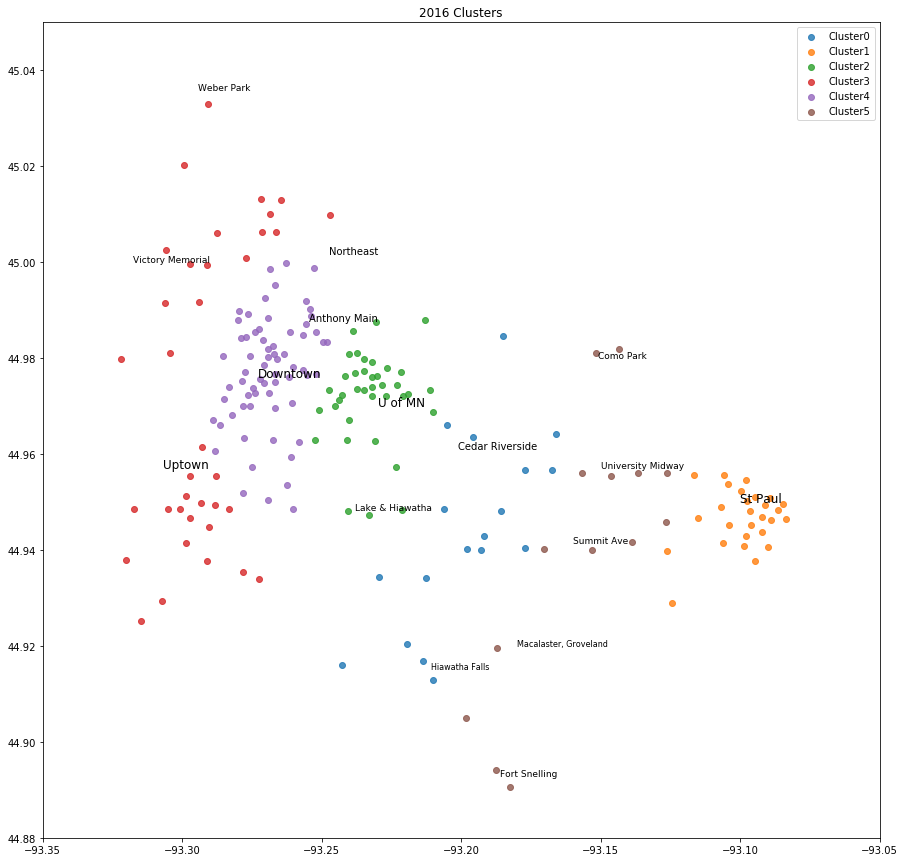

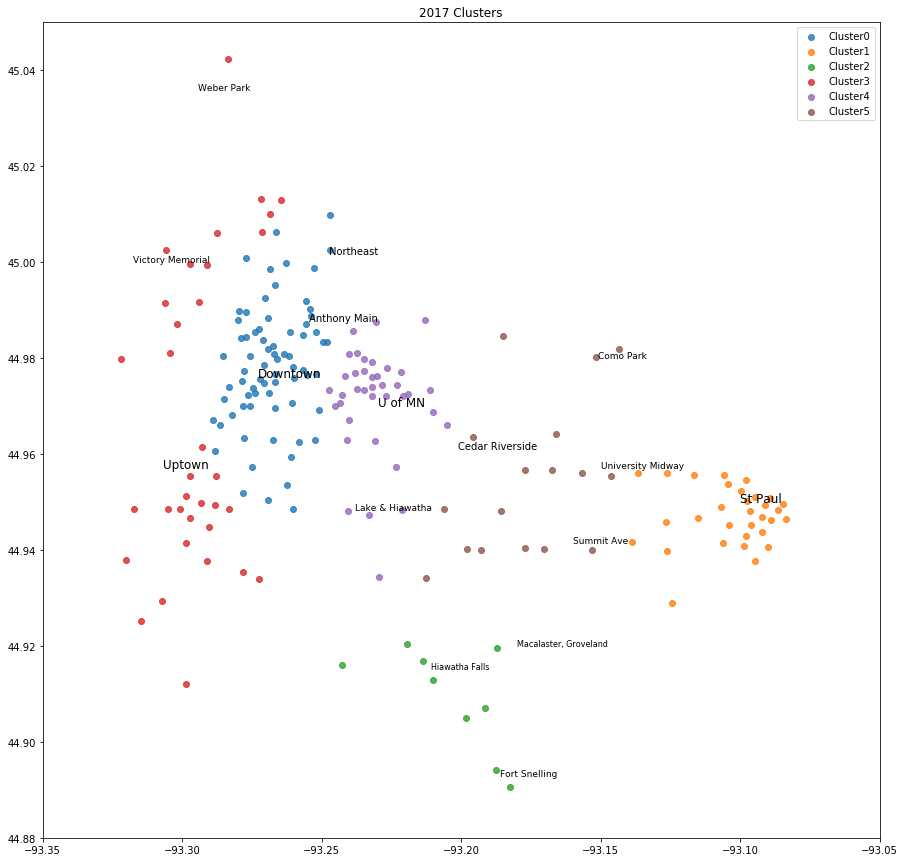

In [5]:
import matplotlib.pyplot as plt

for year in [2013 + x for x in range(5)] :

    plt.figure(figsize=[15,15])
    plt.xlim([-93.35,-93.05])
    plt.ylim([44.88,45.05])
    plt.text(-93.10, 44.95, 'St Paul', fontsize=12)
    plt.text(-93.18, 44.92, 'Macalaster, Groveland', fontsize=8)
    plt.text(-93.23, 44.97, 'U of MN', fontsize=12)
    plt.text(-93.307, 44.957, 'Uptown', fontsize=12)
    plt.text(-93.201, 44.961, 'Cedar Riverside', fontsize=10)
    
    # Project is being completed by MPLS resident, hence 'Downtown'
    # Also easier to refer to the higher station density area by 'Downtown'
    plt.text(-93.273, 44.976, 'Downtown', fontsize=12)
    plt.text(-93.2546, 44.9878, 'Anthony Main', fontsize=10)
    plt.text(-93.2473, 45.0017, 'Northeast', fontsize=10)
    plt.text(-93.238, 44.9483, 'Lake & Hiawatha', fontsize=9)
    plt.text(-93.211, 44.9152, 'Hiawatha Falls', fontsize=8)
    plt.text(-93.15, 44.957, 'University Midway', fontsize=9)
    plt.text(-93.16, 44.9414, 'Summit Ave', fontsize=9)
    plt.text(-93.3178, 45.0, 'Victory Memorial', fontsize=9)
    plt.text(-93.2943, 45.0358, 'Weber Park', fontsize=9)
    plt.text(-93.1861, 44.8929, 'Fort Snelling', fontsize=9)
    plt.text(-93.1511, 44.98, 'Como Park', fontsize=9)
    #plt.text(-93.1668, 44.9342, 'Here', fontsize=9)
    #plt.text(-93.1874, 44.9343, 'Here', fontsize=9)
    #plt.text(-93.1874, 44.9178, 'Here', fontsize=9)
    #plt.text(-93.1845, 44.9257, 'Here', fontsize=9)
    #plt.text(-93.1660, 44.9039, 'Here', fontsize=9)
    #plt.text(-93.1269, 44.9276, 'Here', fontsize=9)
    
    for k in range(0,6):
        temp = nr_station.loc[year, :][nr_station.loc[year, 'Cluster'] == k]
        ax = plt.scatter(temp.Longitude, temp.Latitude, label='Cluster'+str(k), alpha=.8)
    
        ax = plt.gca()
        ax.set_title(str(year)+' Clusters')
        ax.legend()
    
    plt.savefig("/home/grimoire/Projects/NiceRide/Visualizations/Clusters/"+str(year)+"_clustering.png")
    plt.show()